In [1]:
import numpy as np
import pandas as pd

import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline

In [2]:
# configure pd to view all columns and rows in df.head()
pd.pandas.set_option('display.max_columns', None)
pd.pandas.set_option('display.max_rows', None)

In [3]:
sns.set_theme(style="whitegrid")

In [4]:
import warnings
warnings.filterwarnings('ignore')

In [5]:
data = pd.read_csv("clean_data.csv")

data.shape

(51598, 12)

In [6]:
data["tier"] = np.round(data["targetRank"]/20).astype(np.int8)

In [7]:
data["admit"] = data["admit"].astype(np.int8) 

In [8]:
data = data[data["year"]>2000]
data.shape

(51596, 13)

In [9]:
data.head(10)

,cgpaRatio,greV,greQ,researchExp,industryExp,internExp,journalPubs,confPubs,univName,year,targetRank,admit,tier
0,0.955056,160.0,167.0,0,18,5.0,0,0,Worcester Polytechnic Institute,2015.0,91,1,5
1,0.966420,146.0,157.0,0,66,0.0,0,0,Worcester Polytechnic Institute,2015.0,91,1,5
2,0.814286,148.0,161.0,0,0,0.0,0,0,Worcester Polytechnic Institute,2011.0,91,1,5
3,0.799383,150.0,161.0,0,0,0.0,0,0,Worcester Polytechnic Institute,2015.0,91,1,5
4,0.684211,147.0,156.0,0,0,0.0,0,0,Worcester Polytechnic Institute,2012.0,91,1,5
5,0.864865,152.0,158.0,0,0,0.0,0,0,Worcester Polytechnic Institute,2011.0,91,1,5
6,0.882946,156.0,163.0,0,0,0.0,0,0,Worcester Polytechnic Institute,2011.0,91,1,5
7,0.882946,148.0,153.0,0,0,0.0,0,0,Worcester Polytechnic Institute,2012.0,91,1,5
8,0.844156,152.0,163.0,0,0,0.0,0,0,Worcester Polytechnic Institute,2011.0,91,1,5
9,0.866667,152.0,163.0,0,0,0.0,0,0,Worcester Polytechnic Institute,2011.0,91,1,5


### School

In [52]:
uni = ["Carnegie Mellon University", # 5
       "University of California San Diego", # 9
       "SUNY Stony Brook", #65
      ]
# change this to see  different univer      
i=2

In [53]:
ucsd_data=data[data["univName"]==uni[i]]
print(uni[i],ucsd_data.shape)
ucsd_data=ucsd_data.drop(columns="univName",axis=1)

SUNY Stony Brook (1521, 13)


<Figure size 1008x432 with 0 Axes>

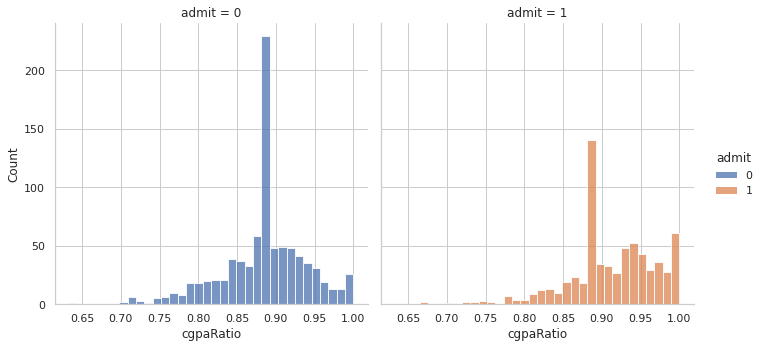

In [54]:
plt.figure(figsize=(14,6))
sns.displot(data=ucsd_data, x="cgpaRatio", hue="admit",col="admit",multiple="stack")
plt.show()

<Figure size 1008x432 with 0 Axes>

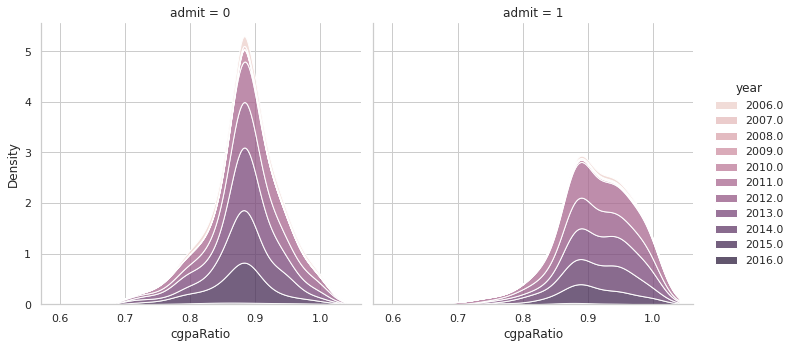

In [55]:
plt.figure(figsize=(14,6))
sns.displot(data=ucsd_data, x="cgpaRatio", hue="year",col="admit",kind="kde",multiple="stack")
plt.show()


In [56]:
ucsd_num_apply = ucsd_data.shape[0]
ucsd_num_admit = ucsd_data["admit"].sum()
ucsd_num_reject = ucsd_num_apply-ucsd_num_admit
print(ucsd_num_admit/ucsd_num_apply*100,"%")

43.52399737015122 %


### GREV

<Figure size 1008x432 with 0 Axes>

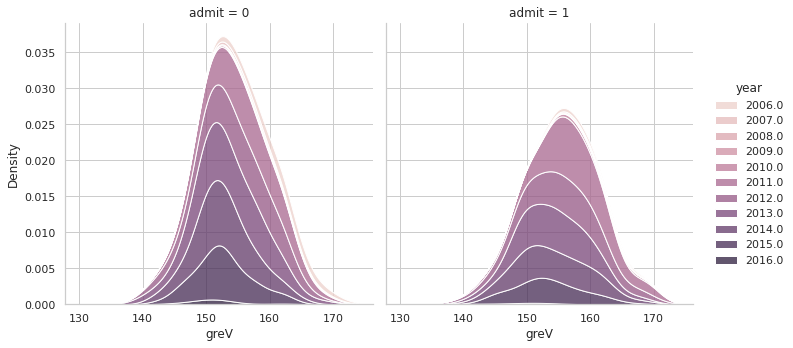

In [57]:
plt.figure(figsize=(14,6))
sns.displot(data=ucsd_data, x="greV", hue="year",col="admit",kind="kde",multiple="stack")
plt.show()

<Figure size 1008x432 with 0 Axes>

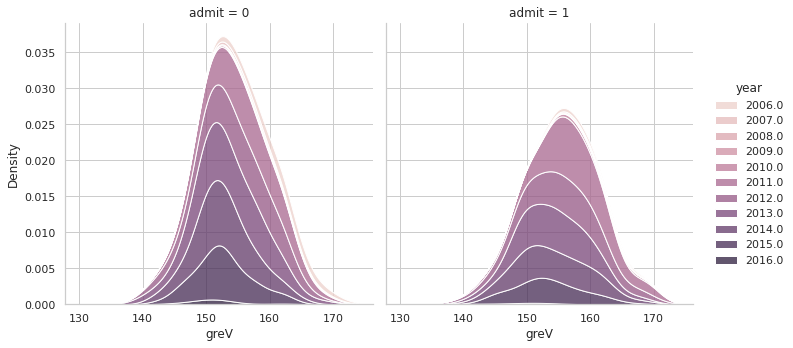

In [58]:
plt.figure(figsize=(14,6))
sns.displot(data=ucsd_data, x="greV", hue="year",col="admit",kind="kde",multiple="stack")
plt.show()

In [59]:
# researchExp industryExp internExp journalPubs confPubs

<Figure size 1008x432 with 0 Axes>

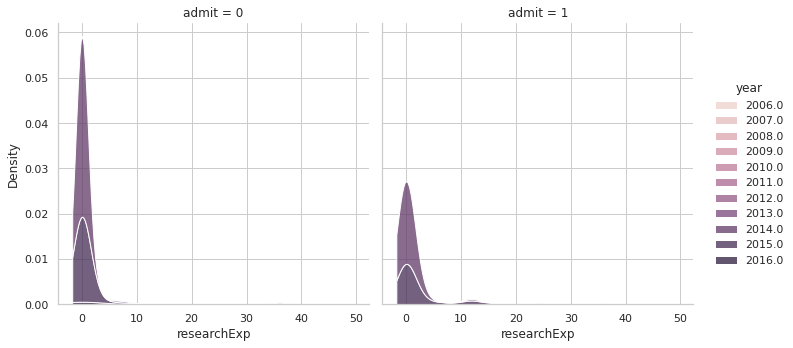

In [60]:
plt.figure(figsize=(14,6))
sns.displot(data=ucsd_data, x="researchExp", hue="year",col="admit",kind="kde",multiple="stack")
plt.show()

<Figure size 1008x432 with 0 Axes>

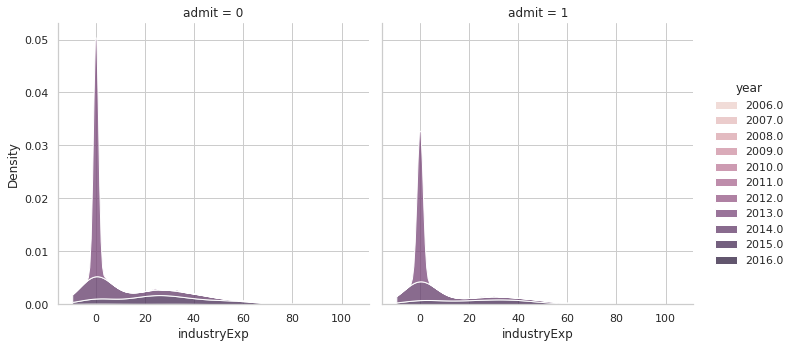

In [61]:
plt.figure(figsize=(14,6))
sns.displot(data=ucsd_data, x="industryExp", hue="year",col="admit",kind="kde",multiple="stack")
plt.show()

<Figure size 1008x432 with 0 Axes>

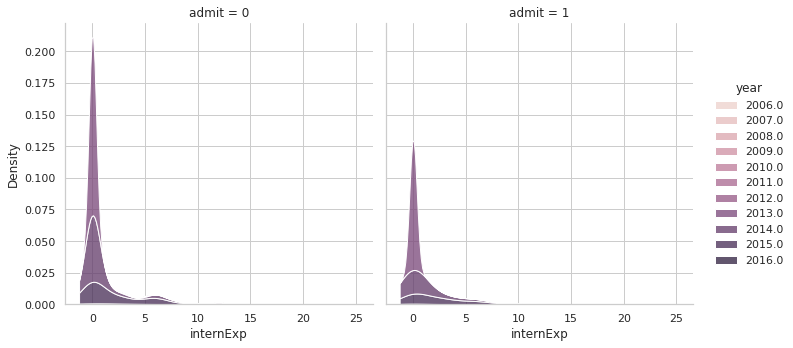

In [62]:
plt.figure(figsize=(14,6))
sns.displot(data=ucsd_data, x="internExp", hue="year",col="admit",kind="kde",multiple="stack")
plt.show()

In [63]:
# plt.figure(figsize=(14,6))
# sns.displot(data=ucsd_data, x="journalPubs", hue="year",col="admit",kind="kde",multiple="stack")
# plt.show()

In [64]:
# plt.figure(figsize=(14,6))
# sns.displot(data=ucsd_data, x="confPubs", hue="year",col="admit",kind="kde",multiple="stack")
# plt.show()

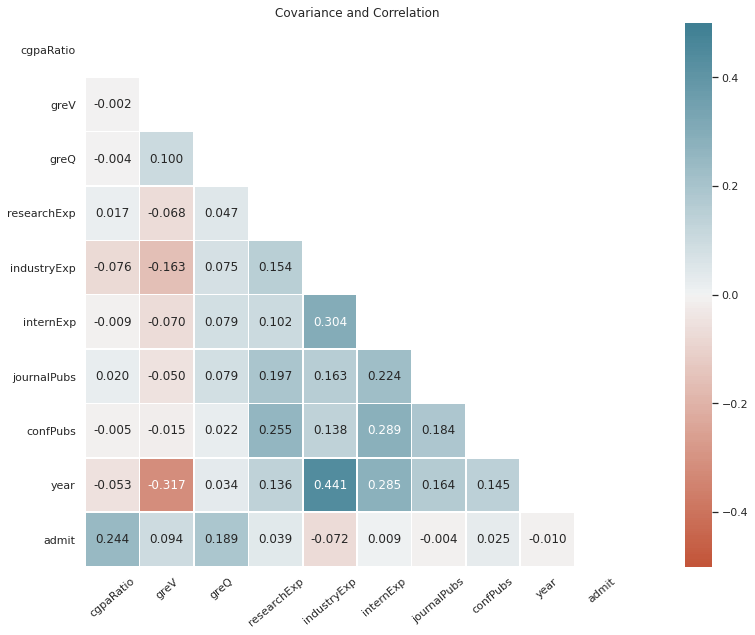

In [65]:
plt.figure(figsize=(20,10))
corr_ucsd = ucsd_data.drop(columns=["targetRank","tier"],axis=1).corr()
mask = np.triu(np.ones_like(corr_ucsd, dtype=np.bool))
sns.heatmap(corr_ucsd, vmin= -0.5, vmax= 0.5, center=0,
            mask=mask,
            cmap=sns.diverging_palette(20, 220, n=200),
            square=True,fmt='.3f', linewidths=.5, annot=True,)
plt.title('Covariance and Correlation')
plt.xticks(rotation=40, fontsize= 11)
plt.yticks(rotation=0, )
plt.show()

In [ ]:
# 0: greV
# 1 cgpa,greQ
# 2 cgpa,greQ

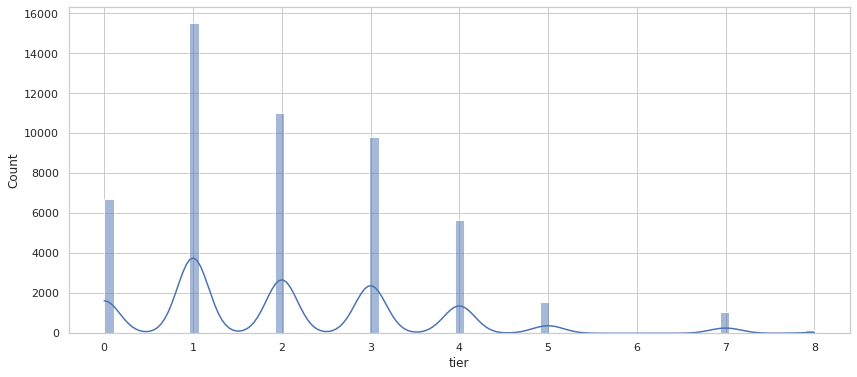

In [24]:
plt.figure(figsize=(14,6))
sns.histplot(data=data, x="tier",kde=True)
plt.show()



<Figure size 1440x576 with 0 Axes>

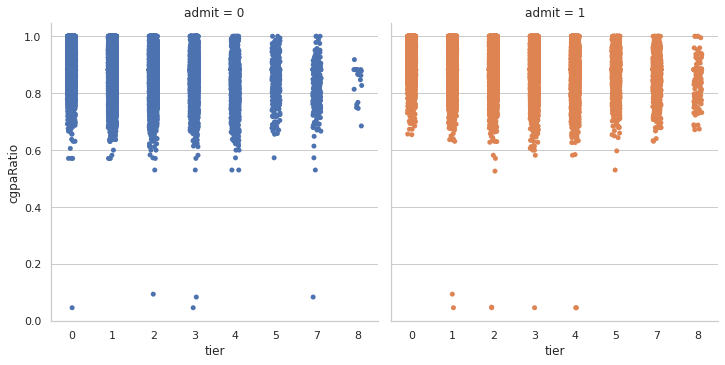

In [25]:
plt.figure(figsize=(20,8))
sns.catplot(x="tier", y="cgpaRatio", data=data, col="admit", hue="admit")
plt.show()

<Figure size 1440x576 with 0 Axes>

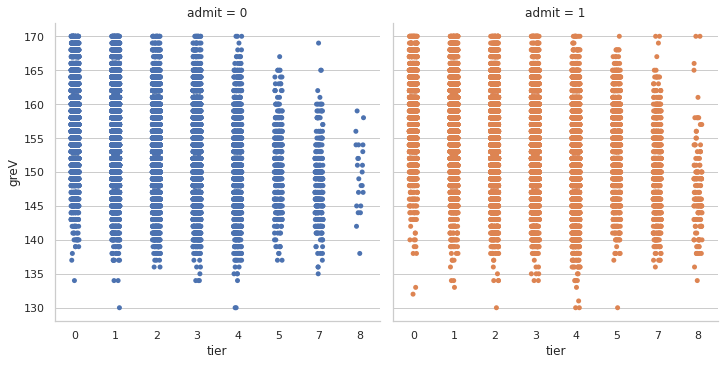

In [26]:
plt.figure(figsize=(20,8))
sns.catplot(x="tier", y="greV", data=data, col="admit", hue="admit")
plt.show()

<Figure size 1440x576 with 0 Axes>

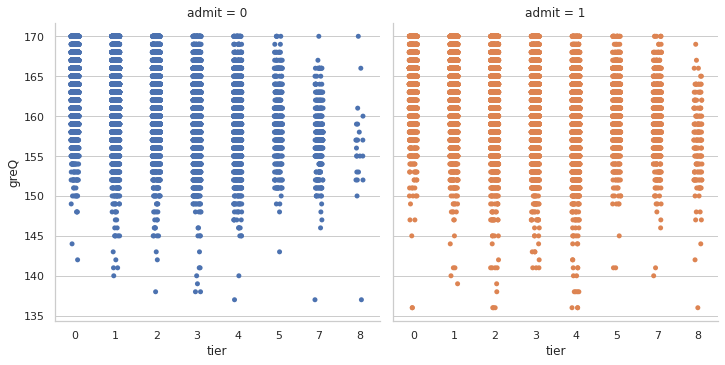

In [27]:
plt.figure(figsize=(20,8))
sns.catplot(x="tier", y="greQ", data=data, col="admit", hue="admit")
plt.show()

<Figure size 1008x432 with 0 Axes>

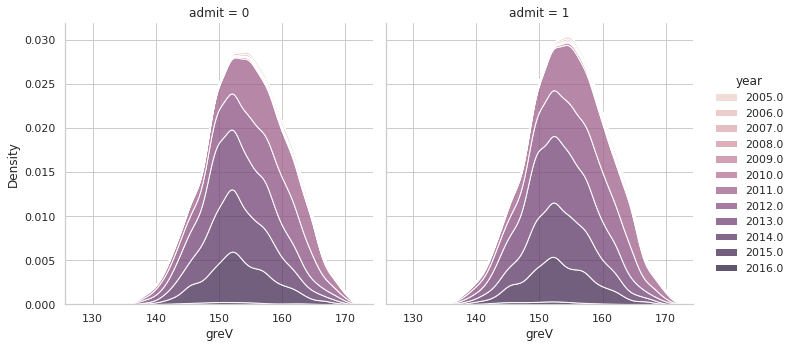

In [28]:
plt.figure(figsize=(14,6))
sns.displot(data=data, x="greV", hue="year",col="admit",kind="kde",multiple="stack")
plt.show()

<Figure size 1008x432 with 0 Axes>

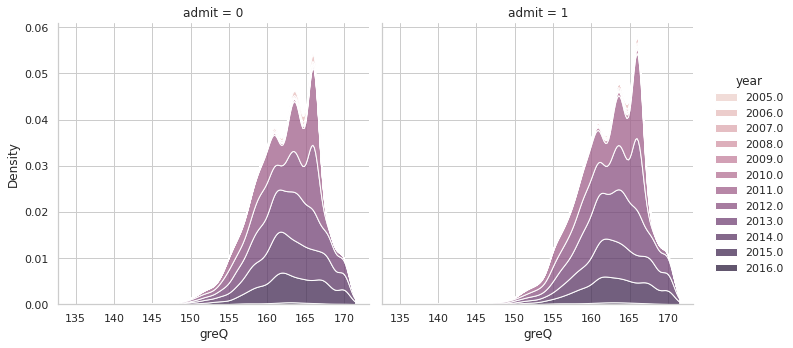

In [29]:
plt.figure(figsize=(14,6))
sns.displot(data=data, x="greQ", hue="year",col="admit",kind="kde",multiple="stack")
plt.show()

In [30]:
# researchExp industryExp internExp journalPubs confPubs

<Figure size 1008x432 with 0 Axes>

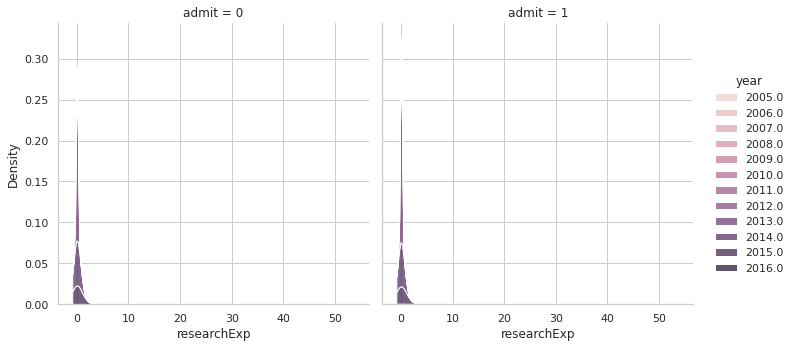

In [31]:
plt.figure(figsize=(14,6))
sns.displot(data=data, x="researchExp", hue="year",col="admit",kind="kde",multiple="stack")
plt.show()

<Figure size 1008x432 with 0 Axes>

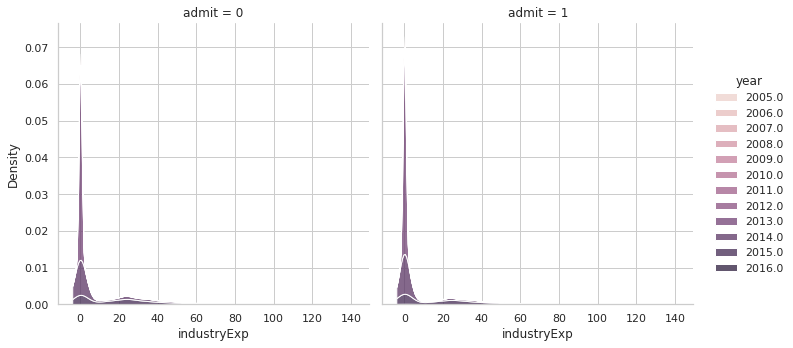

In [32]:
plt.figure(figsize=(14,6))
sns.displot(data=data, x="industryExp", hue="year",col="admit",kind="kde",multiple="stack")
plt.show()

<Figure size 1008x432 with 0 Axes>

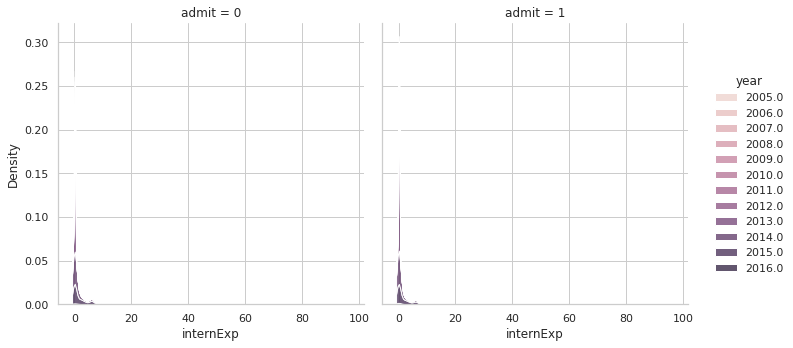

In [33]:
plt.figure(figsize=(14,6))
sns.displot(data=data, x="internExp", hue="year",col="admit",kind="kde",multiple="stack")
plt.show()

<Figure size 1008x432 with 0 Axes>

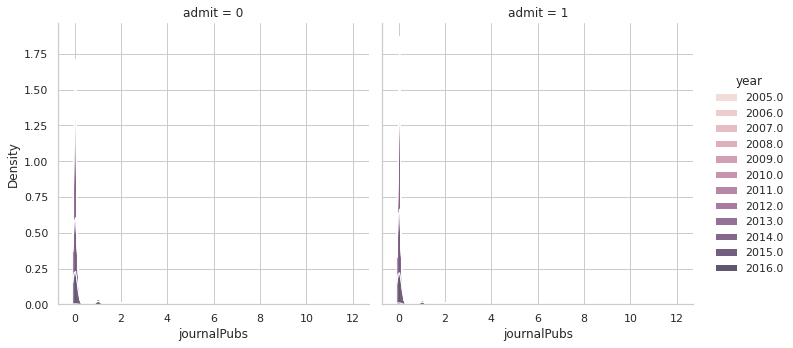

In [34]:
plt.figure(figsize=(14,6))
sns.displot(data=data, x="journalPubs", hue="year",col="admit",kind="kde",multiple="stack")
plt.show()

<Figure size 1008x432 with 0 Axes>

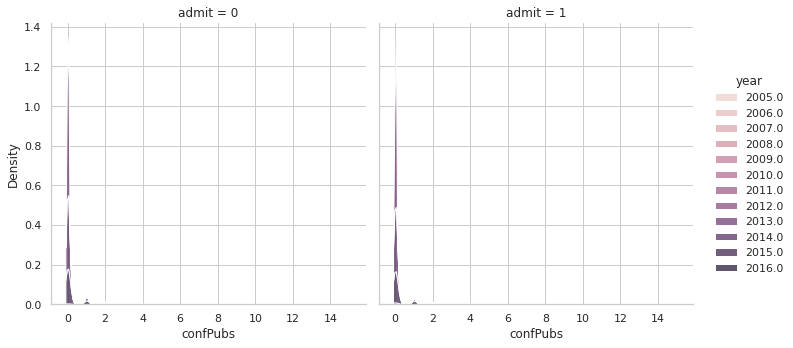

In [35]:
plt.figure(figsize=(14,6))
sns.displot(data=data, x="confPubs", hue="year",col="admit",kind="kde",multiple="stack")
plt.show()

In [36]:
data.head()

,cgpaRatio,greV,greQ,researchExp,industryExp,internExp,journalPubs,confPubs,univName,year,targetRank,admit,tier
0,0.955056,160.0,167.0,0,18,5.0,0,0,Worcester Polytechnic Institute,2015.0,91,1,5
1,0.966420,146.0,157.0,0,66,0.0,0,0,Worcester Polytechnic Institute,2015.0,91,1,5
2,0.814286,148.0,161.0,0,0,0.0,0,0,Worcester Polytechnic Institute,2011.0,91,1,5
3,0.799383,150.0,161.0,0,0,0.0,0,0,Worcester Polytechnic Institute,2015.0,91,1,5
4,0.684211,147.0,156.0,0,0,0.0,0,0,Worcester Polytechnic Institute,2012.0,91,1,5


### Heatmap
0.00-.19 "very weak"

0.20-0.39 “weak”

0.40-0.59 “moderate”

0.60-0.79 “strong”

0.80-1.0 “very strong

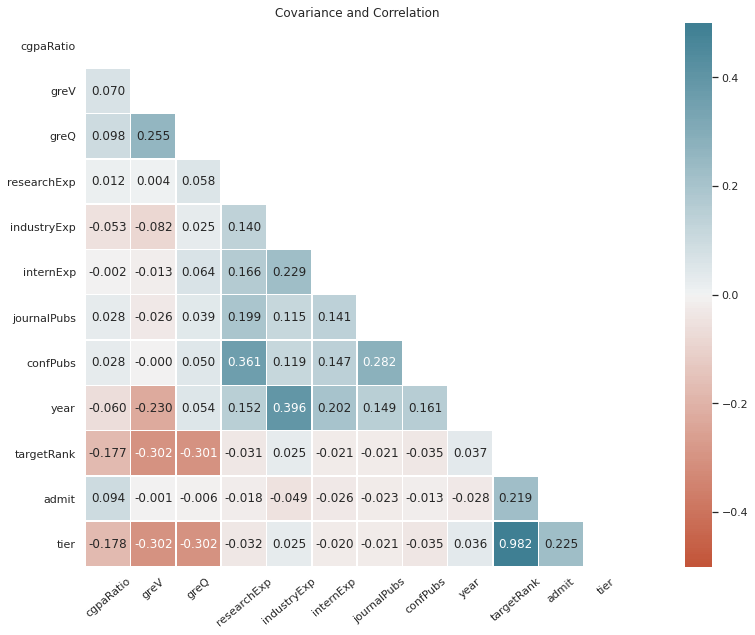

In [37]:
plt.figure(figsize=(20,10))
corr_data = data.corr()
mask = np.triu(np.ones_like(corr_data, dtype=np.bool))
sns.heatmap(corr_data, vmin= -0.5, vmax= 0.5, center=0,
            mask=mask,
            cmap=sns.diverging_palette(20, 220, n=200),
            square=True,fmt='.3f', linewidths=.5, annot=True,)
plt.title('Covariance and Correlation')
plt.xticks(rotation=40, fontsize= 11)
plt.yticks(rotation=0, )
plt.show()